In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import sklearn.datasets
import torchvision.models
import torchvision.transforms
import sklearn.preprocessing

In [12]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = numeros['target']

In [13]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X)
X_train = X_train.reshape((n_imagenes, 8,8))
X_train = np.expand_dims(X_train,1)

In [14]:
inputs = torch.autograd.Variable(torch.Tensor(X_train).float())
targets = torch.autograd.Variable(torch.Tensor(Y).long())

In [32]:
mean = inputs.mean(dim=0)
std = inputs.std(dim=0)
std[std==0]=1.0

for i in range(len(inputs)):
    inputs[i] = (inputs[i]-mean)/std
np.shape(inputs)

torch.Size([1797, 1, 8, 8])

In [92]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 12, kernel_size=4),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(12,8,kernel_size=3),
            torch.nn.ReLU(True))
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose2d(8,12,kernel_size=3),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(12,1,kernel_size=4),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [93]:
# inicializa modelo, loss y optimizador
num_epochs = 100
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

In [94]:
output = model(inputs)
np.shape(output)

torch.Size([1797, 1, 8, 8])

In [95]:
# entrenamiento
L=[]
for epoch in range(num_epochs):
    output = model(inputs)
    loss = distance(output, inputs)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    L.append(loss.item())
    print(epoch)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


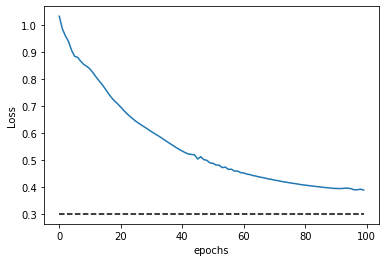

In [96]:
n = np.arange(num_epochs)
plt.plot(n,L)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.hlines(0.3,linestyles='dashed',xmin=n[0],xmax=n[-1])

In [99]:
x_transform = model(inputs)
latent_space = model.encoder(inputs)

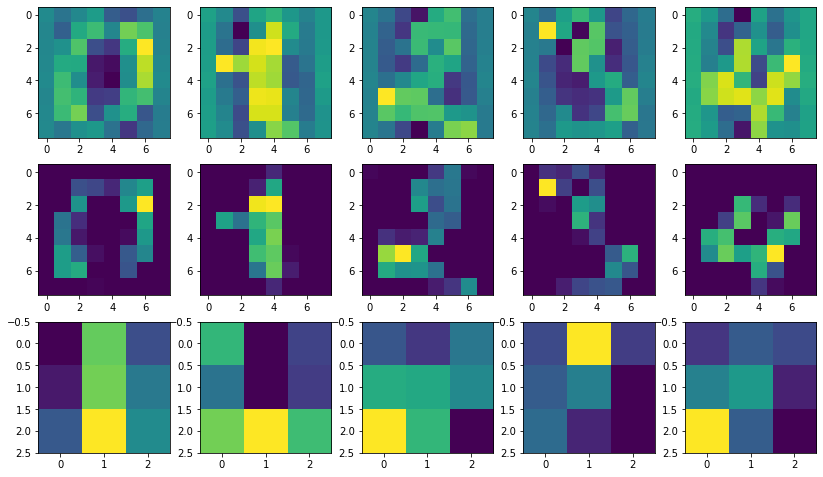

In [100]:
# muestra los resultados de las cuatro capas de convolucion
plt.figure(figsize=(14,14))
offset = 0
for i in range(5):
    plt.subplot(5,5,i+1) #imagenes originales
    plt.imshow(inputs[i+offset][0].detach().numpy())
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())